In [2]:
from fastai.vision.all import *


In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=[Resize(224, method='squish')],
    # Specify path to subfolders containing images
    get_items=get_image_files,
    # Use parent folder name as label
    get_y=parent_label
).dataloaders('data/atleast_5k', bs=32)  # Adjusted path concatenation here

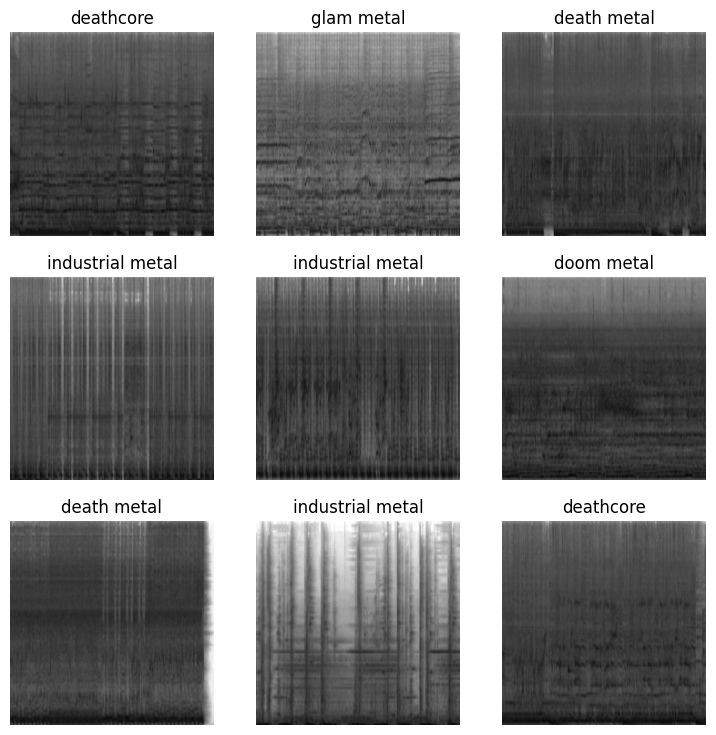

In [4]:
dls.show_batch()

In [4]:
torch.cuda.empty_cache()
# train the model on (data, model, metrics)
learn = vision_learner(dls, resnet34, metrics=error_rate)
# how to fit the pre-trained model (nr epochs)
learn.fine_tune(5)
# fine_tune for pretrained model, fit for new model

epoch,train_loss,valid_loss,error_rate,time
0,2.043364,1.914737,0.635189,18:05


epoch,train_loss,valid_loss,error_rate,time
0,1.698693,1.654094,0.544205,21:36
1,1.564559,1.552088,0.507121,48:45
2,1.376853,1.436807,0.465227,1:08:15
3,0.975207,1.469822,0.458220,40:04
4,0.681526,1.672467,0.471364,22:36


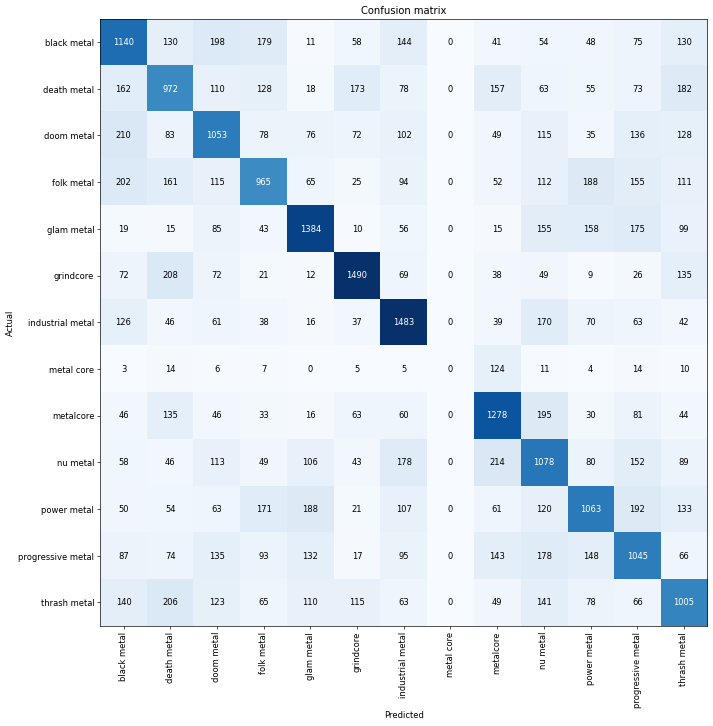

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)